In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau
import seaborn as sns

wave1 = pd.read_csv('wave1.csv')
wave2 = pd.read_csv('wave2.csv')
wave3 = pd.read_csv('wave3.csv')
wave4 = pd.read_csv('wave4.csv')

#### Null Hypothesis (H0): There is no significant difference in behavior (online spending habits, stock piling, hygiene habits, security concerns after Covid19, belief on goverment for their and community security) across the four survey waves.

#### Alternative Hypothesis (H1): There is a significant difference in behavior (online spending habits, stock piling, hygiene habits, security concerns after Covid19, belief on goverment for their and community security) across the four survey waves.

In [46]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def anova_and_turkey(var, name):
    behavior_data1 = wave1[var]
    behavior_data2 = wave2[var]
    behavior_data3 = wave3[var]
    behavior_data4 = wave4[var]


# Combine behavior data from all waves into a single DataFrame
    behavior_all = pd.concat(
        [behavior_data1, behavior_data2, behavior_data3, behavior_data4], axis=1)
    behavior_all.columns = ['Wave 1', 'Wave 2', 'Wave 3', 'Wave 4']

    # Plotting box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=behavior_all, palette='Set3', showmeans=True)
    plt.title('Behavior Across Survey Waves')
    plt.xlabel('Survey Wave')
    plt.ylabel(name)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Perform ANOVA
    f_statistic, p_value = f_oneway(
        behavior_data1, behavior_data2, behavior_data3, behavior_data4)

    # Print ANOVA results
    print("ANOVA Test Results For " + name + ":")
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

    # Perform post-hoc Tukey's HSD test if ANOVA is significant
    if p_value < 0.05:
        all_behavior_data = np.concatenate(
            [behavior_data1, behavior_data2, behavior_data3, behavior_data4])
        wave_labels = ['Wave 1'] * len(behavior_data1) + ['Wave 2'] * len(behavior_data2) + [
            'Wave 3'] * len(behavior_data3) + ['Wave 4'] * len(behavior_data4)
        posthoc = pairwise_tukeyhsd(all_behavior_data, wave_labels, alpha=0.05)
        print("\nPost-hoc Tukey HSD Test Results:")
        print(posthoc)
    else:
        print("\nNo significant differences found.")


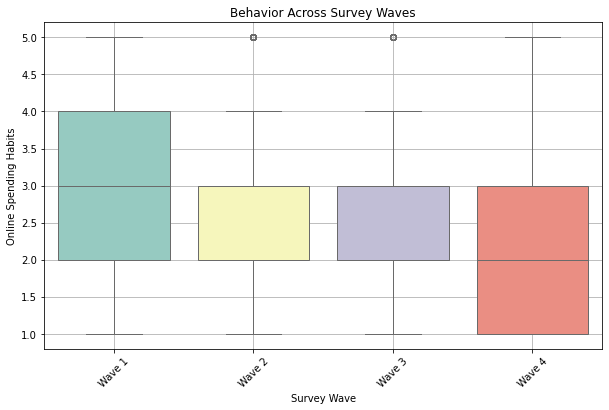

ANOVA Test Results For Online Spending Habits:
F-statistic: 68.28093257584166
P-value: 1.2479440699913738e-42

Post-hoc Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Wave 1 Wave 2   -0.366   -0.0 -0.4882 -0.2438   True
Wave 1 Wave 3  -0.6244   -0.0 -0.7727 -0.4761   True
Wave 1 Wave 4  -0.9367   -0.0 -1.1495 -0.7238   True
Wave 2 Wave 3  -0.2584 0.0001   -0.41 -0.1068   True
Wave 2 Wave 4  -0.5707    0.0 -0.7858 -0.3556   True
Wave 3 Wave 4  -0.3123 0.0029 -0.5432 -0.0813   True
----------------------------------------------------


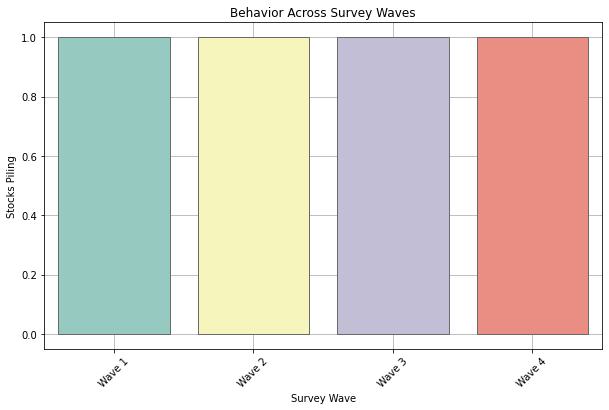

ANOVA Test Results For Stocks Piling:
F-statistic: 8.67898808168965
P-value: 9.899160404818222e-06

Post-hoc Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Wave 1 Wave 2  -0.0581 0.0252 -0.1111 -0.0051   True
Wave 1 Wave 3  -0.1225    0.0 -0.1868 -0.0581   True
Wave 1 Wave 4  -0.0107 0.9908  -0.103  0.0816  False
Wave 2 Wave 3  -0.0644 0.0573 -0.1301  0.0013  False
Wave 2 Wave 4   0.0473 0.5601 -0.0459  0.1406  False
Wave 3 Wave 4   0.1117 0.0216  0.0116  0.2119   True
----------------------------------------------------


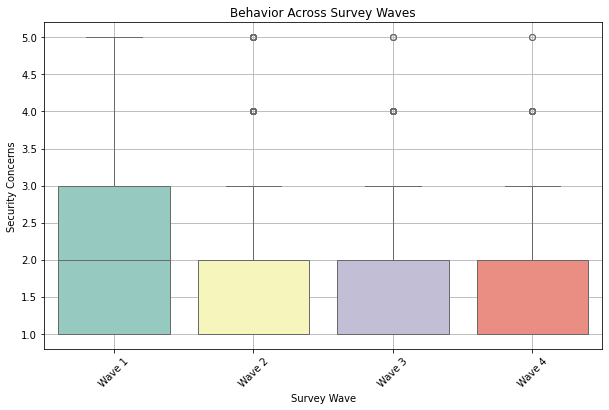

ANOVA Test Results For Security Concerns:
F-statistic: 4.660679556956945
P-value: 0.002973793785312466

Post-hoc Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Wave 1 Wave 2  -0.0289 0.8958 -0.1346  0.0767  False
Wave 1 Wave 3  -0.0292 0.9363 -0.1575   0.099  False
Wave 1 Wave 4  -0.2665 0.0011 -0.4505 -0.0825   True
Wave 2 Wave 3  -0.0003    1.0 -0.1314  0.1307  False
Wave 2 Wave 4  -0.2376 0.0057 -0.4236 -0.0517   True
Wave 3 Wave 4  -0.2373 0.0122  -0.437 -0.0376   True
----------------------------------------------------


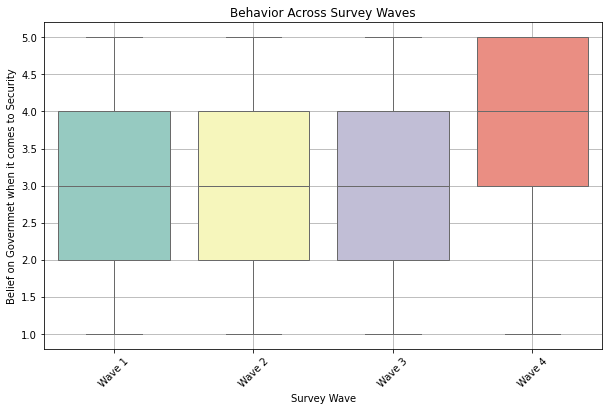

ANOVA Test Results For Belief on Governmet when it comes to Security:
F-statistic: 46.42416982750012
P-value: 2.7727898562792516e-29

Post-hoc Tukey HSD Test Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Wave 1 Wave 2  -0.2233 0.0001 -0.3569 -0.0897   True
Wave 1 Wave 3   0.0893 0.4894 -0.0728  0.2515  False
Wave 1 Wave 4   0.8397   -0.0   0.607  1.0724   True
Wave 2 Wave 3   0.3126    0.0  0.1469  0.4784   True
Wave 2 Wave 4    1.063   -0.0  0.8278  1.2982   True
Wave 3 Wave 4   0.7504   -0.0  0.4979  1.0029   True
----------------------------------------------------


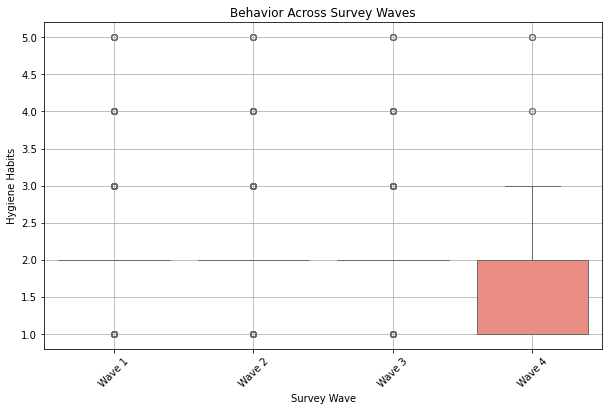

ANOVA Test Results For Hygiene Habits:
F-statistic: 1.2669614265419058
P-value: 0.28400134247494363

No significant differences found.


In [41]:
anova_and_turkey('int_n', 'Online Spending Habits')
anova_and_turkey('sto_n', 'Stocks Piling')
anova_and_turkey('dan_n', 'Security Concerns')
anova_and_turkey('gov_n', 'Belief on Governmet when it comes to Security')
anova_and_turkey('hyg_n', 'Hygiene Habits')



#### Online Spending Habits: Significant differences exist between all pairs of survey waves in terms of online spending habits. This suggests that online spending behavior has varied significantly across different phases of the surveys.

#### Stockpiling Behavior: Significant differences are observed between Wave 1 and Wave 2, Wave 1 and Wave 3, and Wave 3 and Wave 4 in terms of stockpiling behavior. However, no significant difference is found between Wave 1 and Wave 4, Wave 2 and Wave 3, and Wave 2 and Wave 4.

#### Security Concerns After COVID-19: Significant differences are detected between Wave 1 and Wave 4, Wave 2 and Wave 4, and Wave 3 and Wave 4 regarding security concerns after COVID-19. No significant difference is found between Wave 1 and Wave 2, Wave 1 and Wave 3, and Wave 2 and Wave 3.

#### Belief in Government Protection: Significant differences exist between all pairs of survey waves in terms of belief in government protection for individual and community security during the pandemic. This indicates that perceptions of government protection have significantly varied across different phases of the surveys.

#### Hygiene Habits: No significant differences are found in hygiene habits across the four survey waves. This suggests that hygiene behavior has remained relatively consistent over time.


#### Overall, the findings support the alternative hypothesis (H1) indicating that there is a significant difference in behavior across the four survey waves for online spending habits, stockpiling behavior, security concerns after COVID-19, and belief in government protection. However, there is no significant difference in hygiene habits across the waves.